In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

In [ ]:
!unzip asl-alphabet.zip

In [ ]:
!pip install split-folders

In [ ]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import splitfolders

import re

In [ ]:
directory_path = '/content/mydata/train/'

In [ ]:
categories = {
      0: "0",
      1: "1",
      2: "2",
      3: "3",
      4: "4",
      5: "5",
      6: "6",
      7: "7",
      8: "8",
      9: "9",
      10: "a",
      11: "b",
      12: "c",
      13: "d",
      14: "e",
      15: "f",
      16: "g",
      17: "h",
      18: "i",
      19: "j",
      20: "k",
      21: "l",
      22: "m",
      23: "n",
      24: "o",
      25: "p",
      26: "q",
      27: "r",
      28: "s",
      29: "t",
      30: "u",
      31: "v",
      32: "w",
      33: "x",
      34: "y",
      35: "z",
    }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


filenames_list = []
categories_list = []

for category in categories:
    filenames = os.listdir(directory_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")


df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

filename  category
0       2/hand1_2_bot_seg_2_cropped.jpeg         2
1       o/hand2_o_bot_seg_5_cropped.jpeg        24
2     3/hand2_3_right_seg_4_cropped.jpeg         3
3       o/hand2_o_dif_seg_2_cropped.jpeg        24
4       l/hand2_l_dif_seg_1_cropped.jpeg        21
...                                  ...       ...
2510    0/hand5_0_bot_seg_2_cropped.jpeg         0
2511    2/hand2_2_top_seg_3_cropped.jpeg         2
2512  q/hand2_q_right_seg_2_cropped.jpeg        26
2513    8/hand2_8_top_seg_2_cropped.jpeg         8
2514    v/hand3_v_dif_seg_1_cropped.jpeg        31

[2515 rows x 2 columns]

In [ ]:
# p = '/content/asl_dataset/0'
# len(os.listdir(p))

70

In [ ]:
print("number of elements = ", len(df))

number of elements =  2515


In [ ]:
df.filename

0         2/hand1_2_bot_seg_2_cropped.jpeg
1         o/hand2_o_bot_seg_5_cropped.jpeg
2       3/hand2_3_right_seg_4_cropped.jpeg
3         o/hand2_o_dif_seg_2_cropped.jpeg
4         l/hand2_l_dif_seg_1_cropped.jpeg
                       ...                
2510      0/hand5_0_bot_seg_2_cropped.jpeg
2511      2/hand2_2_top_seg_3_cropped.jpeg
2512    q/hand2_q_right_seg_2_cropped.jpeg
2513      8/hand2_8_top_seg_2_cropped.jpeg
2514      v/hand3_v_dif_seg_1_cropped.jpeg
Name: filename, Length: 2515, dtype: object

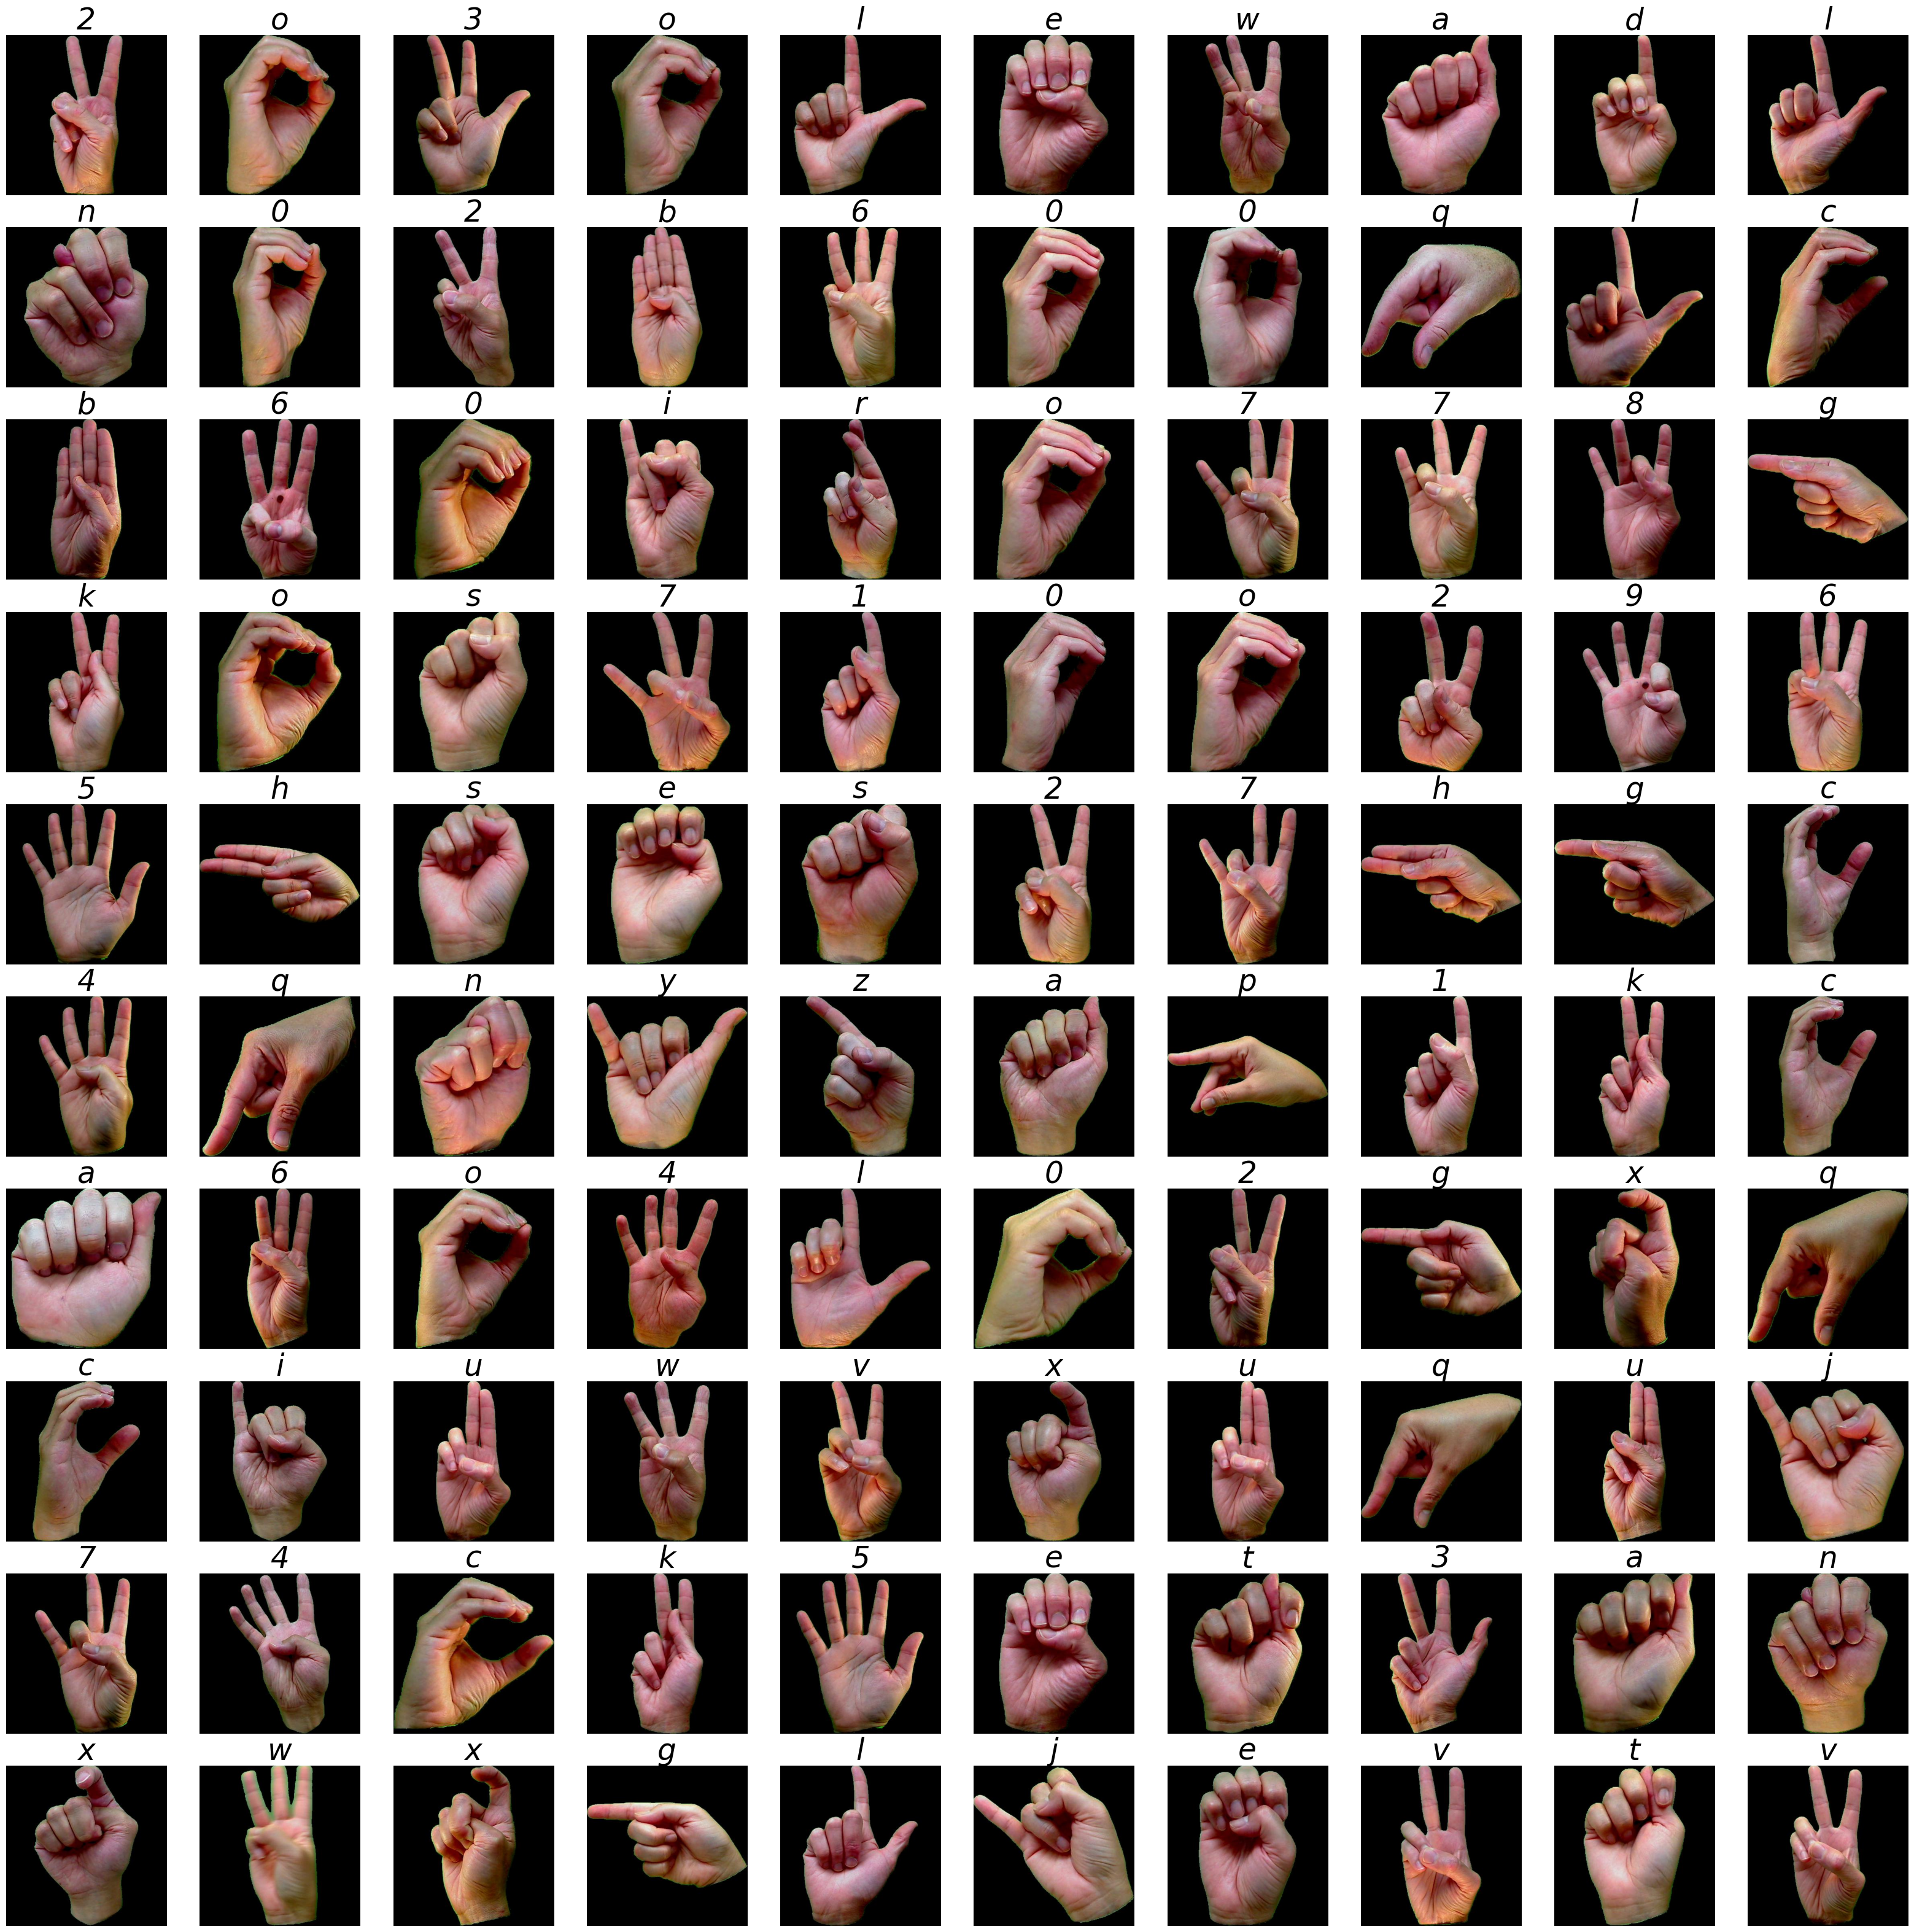

In [ ]:
plt.figure(figsize=(40, 40))

for i in range(100):
  path = directory_path + df.filename[i]
  img = plt.imread(path)
  plt.subplot(10, 10, i+1)
  plt.imshow(img)
  plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
  plt.axis('off')

In [ ]:
splitfolders.ratio('/content/mydata/train',
                   output='/mymodel/working/',
                   seed=1333,
                   ratio=(0.8,0.1,0.1))

Copying files: 2515 files [00:00, 5441.11 files/s]


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_path = '/kaggle/working/train'
val_path = '/kaggle/working/val'
test_path = '/kaggle/working/test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [ ]:
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical',
                                       )

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         shuffle= False)

Found 2012 images belonging to 36 classes.
Found 251 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3, 3),
                           activation = 'relu',
                           padding = 'same',
                           input_shape = (image_size, image_size, img_channel)),
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3, 3),
                           activation = 'relu',
                           padding = 'same',
                           input_shape = (image_size, image_size, img_channel)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3, 3),
                           activation = 'relu',
                           padding = 'same',
                           input_shape = (image_size, image_size, img_channel)),
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3, 3),
                           activation = 'relu',
                           padding = 'same',
                           input_shape = (image_size, image_size, img_channel)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3, 3),
                           activation = 'relu',
                           padding = 'same',
                           input_shape = (image_size, image_size, img_channel)),
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3, 3),
                           activation = 'relu',
                           padding = 'same',
                           input_shape = (image_size, image_size, img_channel)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2), padding = 'same'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(36, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      9248      
                                                        

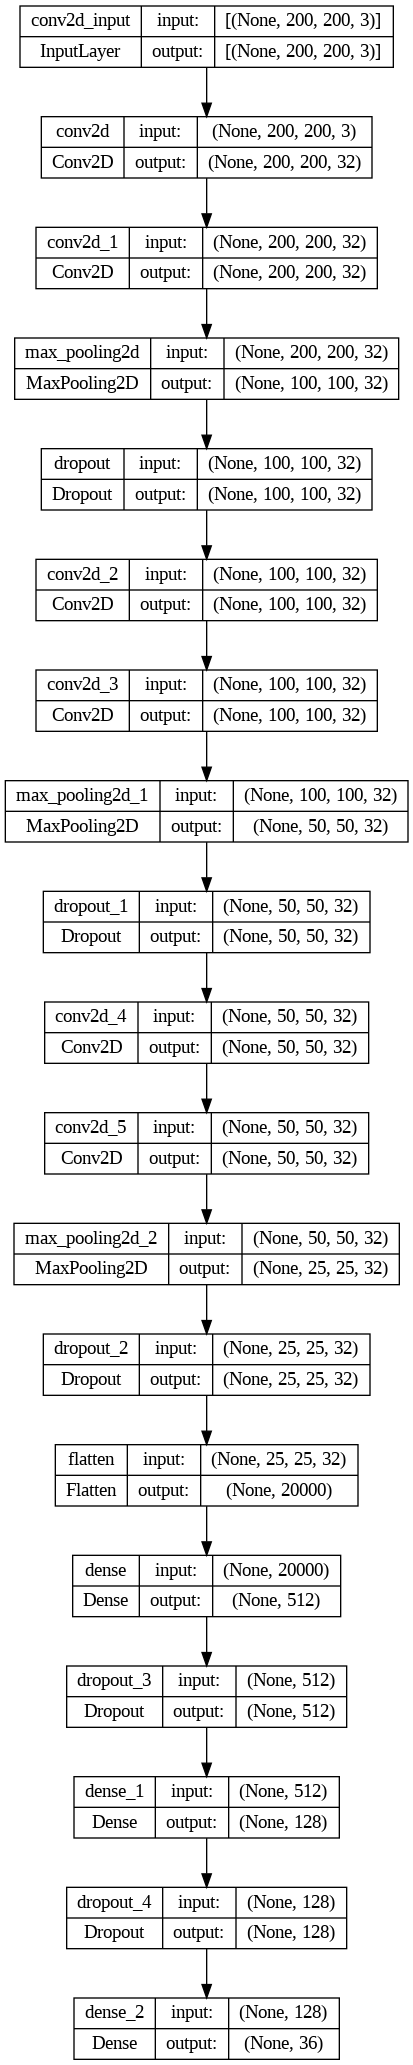

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
early_stoping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

In [ ]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data,
          validation_data = val_data,
          epochs = 30,
          steps_per_epoch = len(train_data),
          callbacks = [early_stoping, reduce_learning_rate])

Epoch 1/30
63/63 [==============================] - 20s 172ms/step - loss: 2.4219 - accuracy: 0.3305 - val_loss: 0.6439 - val_accuracy: 0.7928 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 7s 111ms/step - loss: 0.6711 - accuracy: 0.8007 - val_loss: 0.2196 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 7s 106ms/step - loss: 0.3227 - accuracy: 0.8931 - val_loss: 0.1584 - val_accuracy: 0.9363 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 7s 110ms/step - loss: 0.2180 - accuracy: 0.9329 - val_loss: 0.1727 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 7s 110ms/step - loss: 0.1333 - accuracy: 0.9553 - val_loss: 0.1346 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - 7s 106ms/step - loss: 0.1466 - accuracy: 0.9548 - val_loss: 0.1070 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - 7s 107ms/step - l

In [ ]:
loss, acc = model.evaluate(test_data)

8/8 [==============================] - 0s 52ms/step - loss: 0.2815 - accuracy: 0.9563


In [ ]:
print(f'Loss for test Data : {loss}')
print(f'Accuracy for test Data : {acc}')

Loss for test Data : 0.28154414892196655
Accuracy for test Data : 0.9563491940498352


In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  acc = history.history['accuracy']

  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'Training Loss')
  plt.plot(epochs, val_loss, label = 'Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()

  plt.figure()
  plt.plot(epochs, acc, label = 'Training Accuracy')
  plt.plot(epochs, val_acc, label = 'Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend()

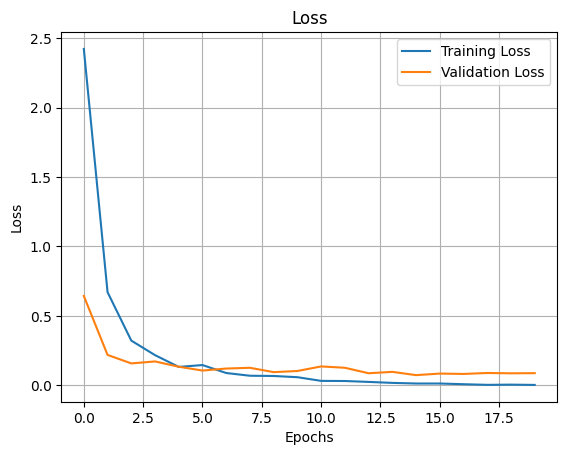

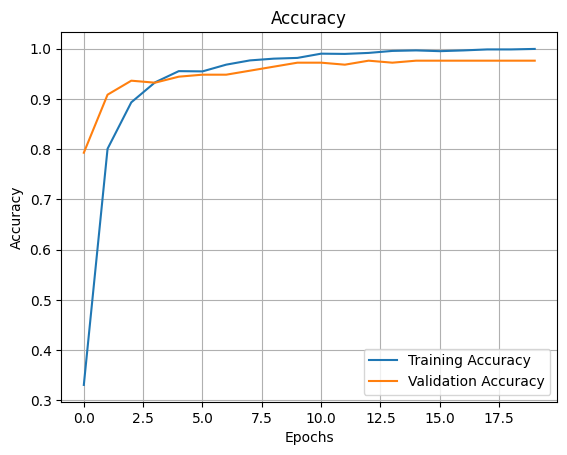

In [ ]:
plot_loss_curves(history)

In [ ]:
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 95.63491940498352
The Loss of the model for testing data is: 0.28154414892196655


In [ ]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 241
Incorrect predicted classes: 11


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.78      1.00      0.88         7
           2       0.75      0.86      0.80         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      0.86      0.92         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      0.86      0.92         7
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         7
          16       1.00      0.86      0.92         7
          17       1.00    

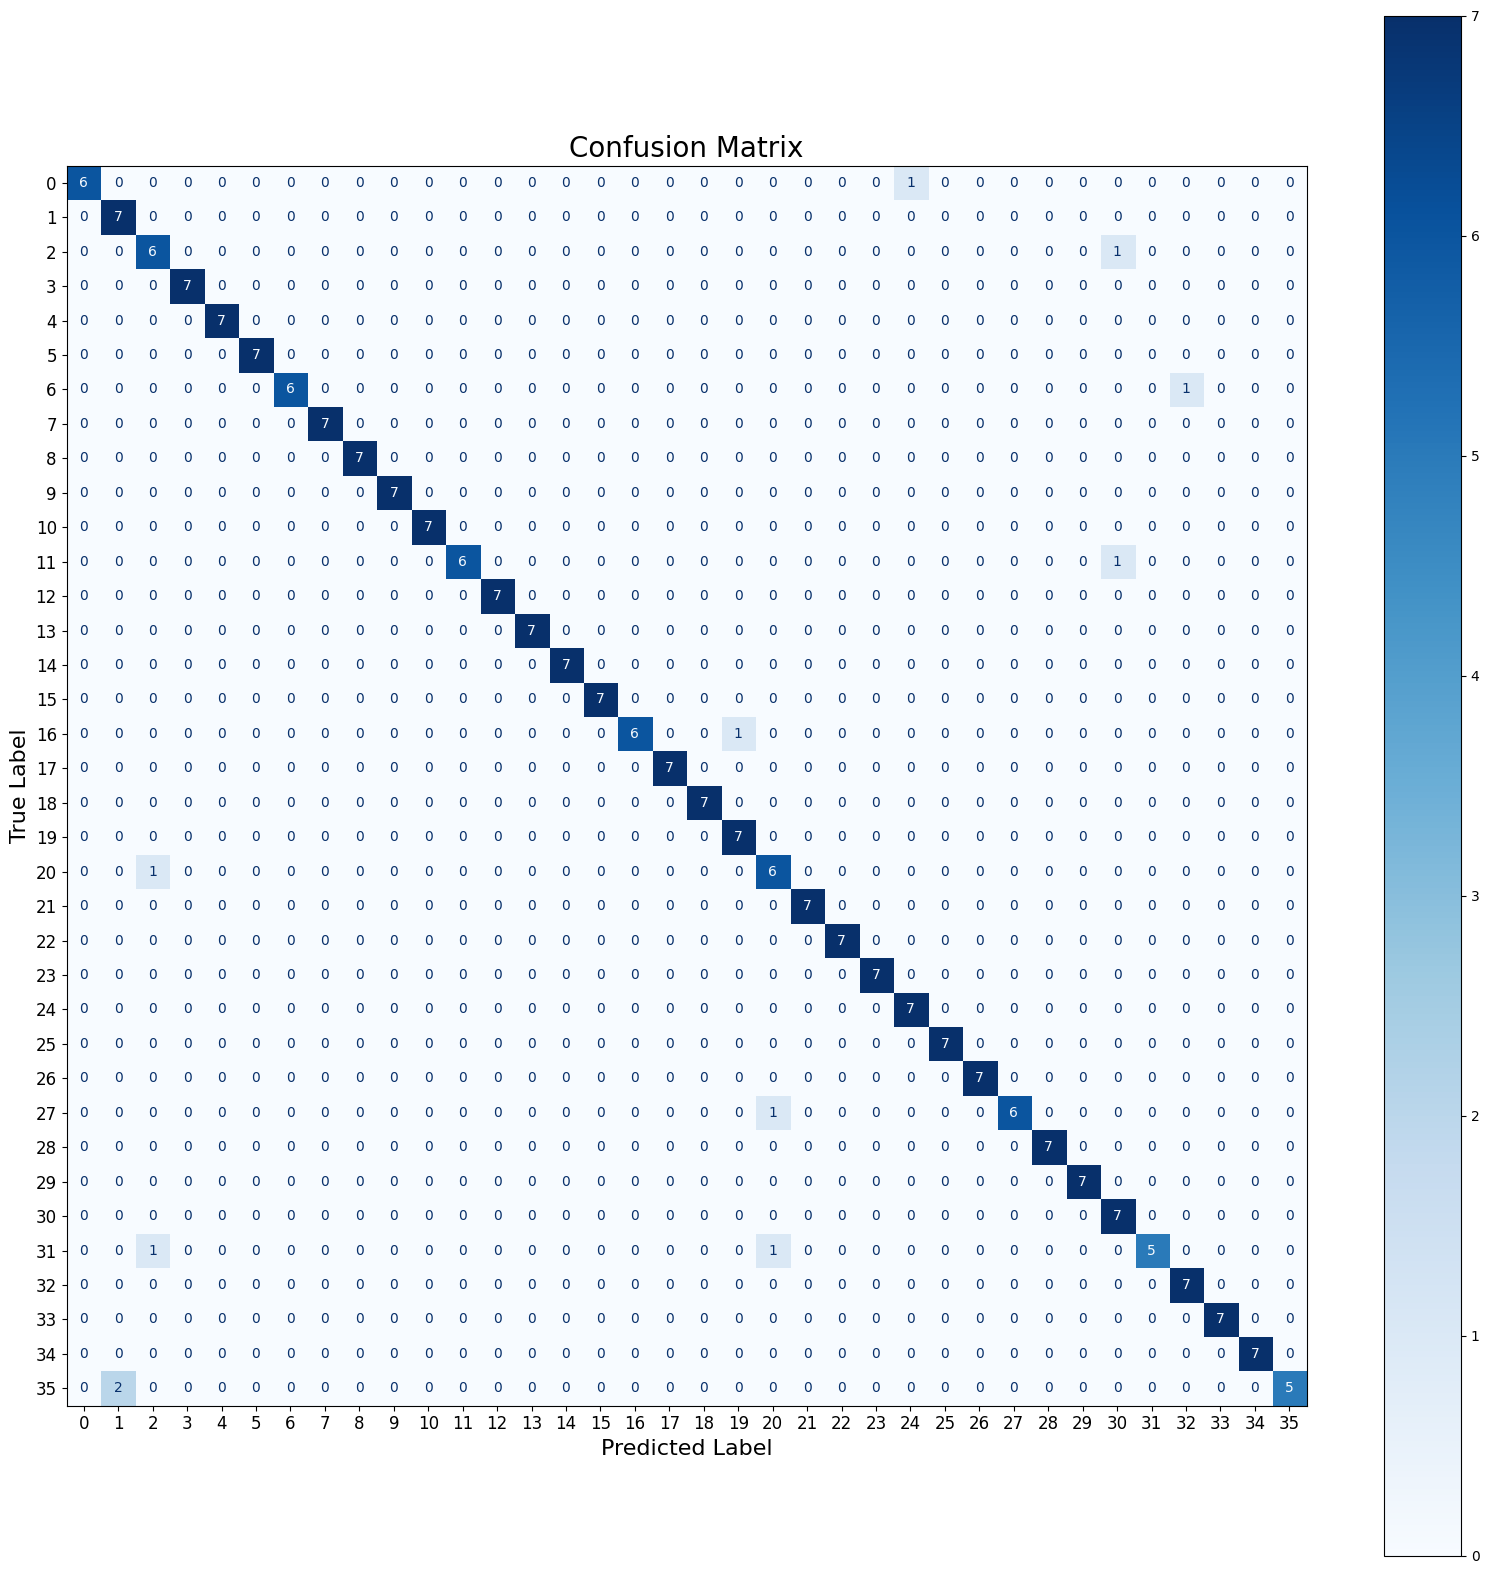

In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=categories)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())

plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

plt.show()

In [ ]:
categories

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'a',
 11: 'b',
 12: 'c',
 13: 'd',
 14: 'e',
 15: 'f',
 16: 'g',
 17: 'h',
 18: 'i',
 19: 'j',
 20: 'k',
 21: 'l',
 22: 'm',
 23: 'n',
 24: 'o',
 25: 'p',
 26: 'q',
 27: 'r',
 28: 's',
 29: 't',
 30: 'u',
 31: 'v',
 32: 'w',
 33: 'x',
 34: 'y',
 35: 'z'}

1/1 [==============================] - 0s 393ms/step


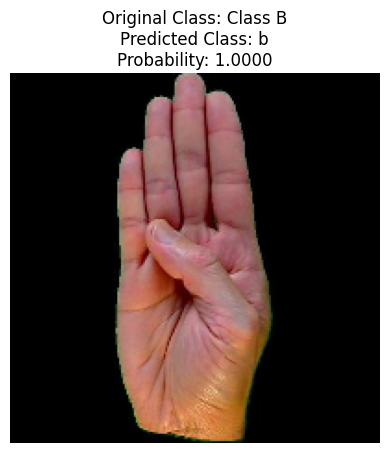

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path = '/content/asl_dataset/b/hand1_b_bot_seg_1_cropped.jpeg'
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


prediction = model.predict(img_array)


predicted_class = np.argmax(prediction, axis=1)
predicted_probability = np.max(prediction, axis=1)


class_labels = categories


plt.imshow(img)
plt.axis('off')
plt.title(f'Original Class: Class B\nPredicted Class: {class_labels[predicted_class[0]]}\nProbability: {predicted_probability[0]:.4f}')
plt.show()


In [ ]:
model.save('SignLangDetect.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def preprocess_and_predict(img_path):
  img = image.load_img(img_path, target_size=(200, 200))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0


  prediction = model.predict(img_array)


  predicted_class = np.argmax(prediction, axis=1)
  predicted_probability = np.max(prediction, axis=1)


  class_labels = categories


  plt.imshow(img)
  plt.axis('off')
  plt.title(f'Predicted Class: {class_labels[predicted_class[0]]}\nProbability: {predicted_probability[0]:.4f}')
  plt.show()

1/1 [==============================] - 0s 71ms/step


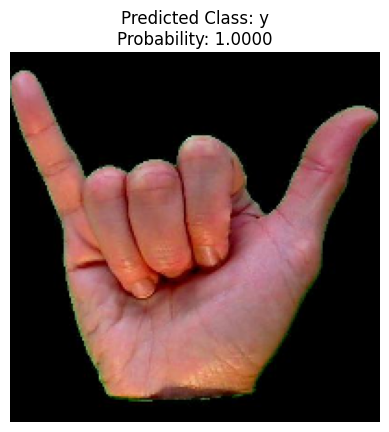

In [ ]:
preprocess_and_predict('/content/asl_dataset/y/hand1_y_bot_seg_1_cropped.jpeg')

1/1 [==============================] - 0s 53ms/step


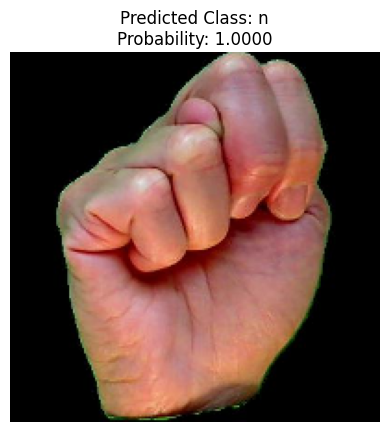

In [ ]:
preprocess_and_predict('/content/asl_dataset/n/hand1_n_bot_seg_1_cropped.jpeg')

1/1 [==============================] - 0s 68ms/step


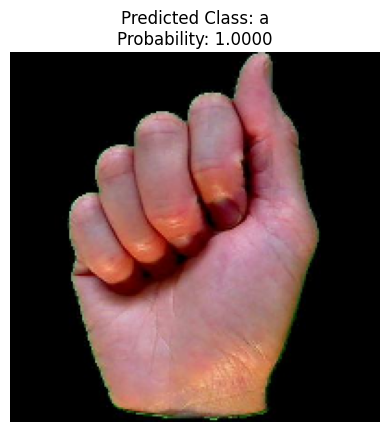

In [ ]:
preprocess_and_predict('/content/asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg')

1/1 [==============================] - 0s 56ms/step


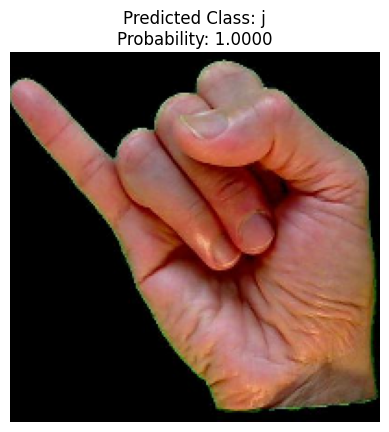

In [ ]:
preprocess_and_predict('/content/asl_dataset/j/hand1_j_bot_seg_1_cropped.jpeg')